## 점진적인 학습이란
#### - 훈련에 필요한 데이터가 한번에 다 수집된 경우가 아니라, 시간차를 두고 수집이 되는 경우에는 훈련모델 학습은 언제해야 할까?
#### - 이런 문제를 해결하기 위해 수집될 떄 마다 학습을 계속 이어나가는 훈련방식을 '점진적인 학습' 이라고 합니다
#### : '점진적인 학습' 또는 온라인 학습이라고 칭함
#### - 대표적인 학습 알고리즘은 '확률적 경사하강법' 이라고합니다.

## 확률적 경사 하강법(SGD : Stochasitc Gradient Descent)
#### - 경사 : 우리가 흔히 사용하는 단어인 경사(기울기)입니다
#### - 하강법 : 내려가는 방법
#### - 경사하강법 : 원하는 지점에 도달하기 위해 가장 가파른 경사를 따라 내려가는 방법을 찾는 방법
#### - 확률적  : ' 무작위하게' 또는 '랜덤하게'의 기술적 표현 언어
#### : 훈련데이터의 전체 특성들 중에서 하나씩 랜덤하게 선택하여 가장 가파른길 찾음, 가장빠른길 가장 경사가 급한 길 선택 
#### : (포물선 꼭짓점이 아래로)

## <확률적 경사 하강법 순서>
#### 1. 훈련데이터에서 랜덤하게 하나의 특성을 선택
#### 2. 
#### 3. 내려 갈수 있을때 까지 내려갑니다
#### 4.선택된 특성을 이용해서 경사를 조금씩 내려갈 수있을때까지 내려간다.

### 1. 데이터 불러들이기

In [1]:
import pandas as pd
import numpy as np

In [2]:
fish = pd.read_csv('./data/07_fish.csv')
print(len(fish))
fish.head()

159


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# 결측치 확인
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


## 2.데이터 전처리

In [4]:
### 독립변수와 종속변수 분리하여 변수화
# 독립변수명 : fish_input
# 종속변수명 : fish_target

# 독립변수 입력 데이터 추출(2차원 배열 형태로)
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

# 종속변수 타켓 데이터 추출(1차원 배열 형태로)
fish_target = fish[['Species']].to_numpy()

print(fish_target.shape)

(159, 1)


In [5]:
### 훈련(입력, 타겟), 테스트(입력,타켓) 데이터 분류하기
### 훈련데이터 (입력, 타켓)와 테스트 데이터( 입력, 타겟)분류

# 훈련 : 테스트  = 75:25 (기본값)
from sklearn.model_selection import train_test_split

# 순서 : 입력먼저, 타켓 다음 (실무에서는 random_state 사용 X)
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, test_size = 0.25,random_state=42)

print('훈련-입력',train_input.shape)
print('훈련-타겟',train_target.shape)
print('테스트-입력',test_input.shape)
print('테스트-타겟',test_target.shape)

훈련-입력 (119, 5)
훈련-타겟 (119, 1)
테스트-입력 (40, 5)
테스트-타겟 (40, 1)


In [6]:
### 정규화(표준화) - > 독립변수 표준점수로 동일하게 표준화(스케일)
### 독립변수가 여러개일때는 항상 정규화 작업 해준다 

from sklearn.preprocessing import StandardScaler

# 클래스 모델 생성
ss = StandardScaler()

# 스스로 표준점수 생성 
ss.fit(train_input)

## 훈련데이터 표준점수로 변환하기
train_scaled = ss.transform(train_input)

### 테스트 데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_input)

# ** 종속변수는 정규화 작업 하지않는다 **

## 확률적 경사 하강법을 이용한 분류 

In [17]:
train_target

array([['Bream'],
       ['Pike'],
       ['Smelt'],
       ['Perch'],
       ['Parkki'],
       ['Roach'],
       ['Perch'],
       ['Bream'],
       ['Perch'],
       ['Perch'],
       ['Perch'],
       ['Bream'],
       ['Perch'],
       ['Parkki'],
       ['Perch'],
       ['Bream'],
       ['Smelt'],
       ['Perch'],
       ['Roach'],
       ['Bream'],
       ['Pike'],
       ['Bream'],
       ['Pike'],
       ['Perch'],
       ['Parkki'],
       ['Bream'],
       ['Perch'],
       ['Pike'],
       ['Bream'],
       ['Perch'],
       ['Parkki'],
       ['Roach'],
       ['Perch'],
       ['Bream'],
       ['Roach'],
       ['Perch'],
       ['Bream'],
       ['Bream'],
       ['Perch'],
       ['Perch'],
       ['Roach'],
       ['Pike'],
       ['Perch'],
       ['Smelt'],
       ['Pike'],
       ['Roach'],
       ['Perch'],
       ['Parkki'],
       ['Perch'],
       ['Bream'],
       ['Perch'],
       ['Smelt'],
       ['Perch'],
       ['Parkki'],
       ['Smelt'],
       ['P

In [8]:
### 객체(모델) 생성하기
# - loss    : 손실함수(log=로지스틱 손실함수 사용)
#           : 조금씩 내려오면서 손실이 작은쪽을 찾아서 내려오기 위한 방법
#           : 사람은 손실이 작은 값들을 알 수 없습니다(학습모델이 가지고 있는 손실 계산식을 통해 결정합니다.)
#           : 분류 결과에 만족한다면 다 내려왔다고 인정해야 함
#           : 사람이 직접 만들거나 직접 계산하지 않음(관여하지 않음)
#           : 훈련모델이 직접 수행
#           : 사람은 분류 성격에 맞게 사용할 손실함수를 지정만 합니다
#- max_iter : 훈련반복횟수 ( 전체 특성이 다 끝나면 1회로 본다 -> 이를 '에포크'라 한다)
#           :훈련 반복횟수가 부족한 경우 다내려오기 전에 끝
#           : 분류확도가 낮아질수도(과소적합) 높아질수도(과대적합
#           : 가장 적합한 반복시점(에포크)를 찾아야한다
#           : 에포크는 사람이 찾아서 max_iter에 넣어줄수있다 (사람이 찾아서 넣어주는 값 = 하이퍼 파리미터)

#### 1. 과대적합 : 훈련데이터의 평가결과가 너무 높고, 테스트데이터의 평가가 너무 낮을 경우
#### 2. 과소적합 : 훈련데이터의 평가 결과가 낮고 ,테스트데이터의 평가가 높은 경우

In [9]:
### 사용클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

# 훈련시키기
sc.fit(train_scaled,train_target)

# 
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

#[해석]
# - 훈련모델의 학습능력이 다소 떨어진다
# - 전제적으로 과소적합 ( 훈련모델 정확도 테스모델 정확도)

0.773109243697479
0.775


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [10]:
### 점진적 학습 시작
# 새로운 데이터가 들어왔다고 가정 ( 실제로는 새로운 데이터 사용해야한다)
# sc.partial_fit : 훈련 끝난 시점부터 다시 훈련 시키는 함수 
sc.partial_fit(train_scaled,train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 에포크 반복 횟수 찾기(가장 최적화된 횟수)

In [11]:
sc = SGDClassifier(loss='log',random_state =42)

train_score = []
test_score = []

# 범주 고유값 
classes = np.unique(train_target)
# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장 
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target,classes=classes)
    
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))
    

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\821

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\821

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\821

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\821

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\821

C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\821

In [12]:
print('훈련 정확도 리스트 갯수 = ', len(train_score))
print('테스트 정확도 리스트 갯수 = ', len(test_score))

훈련 정확도 리스트 갯수 =  300
테스트 정확도 리스트 갯수 =  300


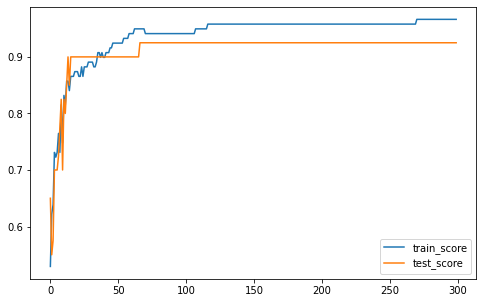

In [13]:
### 최적의 에포크 위치 확인하기 : 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

# 테스트 그래프와 훈련그래프가 가까이 위치하고있는 x 값중 같은 값으로 유지되는 그래프 기준 ,변하는 그래프의 변하기 직전 위치 
# 이 그래프에서는 대략 max_iter = 100 

In [18]:
## 최적
### 사용클래스(모델) : SGDClassifier
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
# tol=None 모델이 스스로 찾는 최적값을 무시하고  우리가 지정해준 max_iter 값까지 수행하도록 
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)

# 훈련시키기
sc.fit(train_scaled,train_target)


print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))


0.957983193277311
0.925


C:\Users\82102\ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\82102\ml\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 모델 예측값 데이터프레임에 저장하기 

In [15]:
### [문제]
#### -새로운 데이터가 수집되었다고 가정하고 예측을 통해 결과값 저장하기
# - 기존 fish 데이터 전체를 신규데이터라고 가정하고 진행
# - 신규 데이터는 Weight, Length, Diagonal,Height, Width
#   (데이터 프레임 변수는 별도로 만들어서 사용)

#### - 데이터 프레임에 예측결과에 대한 Species_pred 컬럼 추가 

#### < 출력결과>
# - Species_pred가 추가된 데이터 프레임 출력
# (출력결과)데이터 프레임의 7개 컬럼 모두 출력
# Weight, Length, Diagonal, Height, Width, Species, Species_pred

# - 정답을 맞춘갯수와 틀린갯수 출력하기
# (출력예시) 총 갯수 [159]건 중에 정답갯수 [149]건 오답갯수[10]건

# - 정답률과 오답률 출력하기
# (출력예시) 총 100%중 정답률 [93.71%] 오답률 [6.29%]

fish_new = fish[['Weight', 'Length', 'Diagonal','Height', 'Width']].to_numpy()
pred_fish = ss.transform(fish_new)
sc.predict(pred_fish)
fish['Species_pred'] = sc.predict(pred_fish)

# fish['Species'] == fish['Species_pred']

print('총갯수 [159] 건 중에 정답갯수 ','[',len(fish[fish['Species'] == fish['Species_pred']]),']건','오답갯수[',len(fish[fish['Species'] != fish['Species_pred']]),']건')
print('----------------------------------------------------------------------')
print('총 100%중 정답률 ',len(fish[fish['Species'] == fish['Species_pred']])/fish['Species'].count()*100,'%','오답률 ',len(fish[fish['Species'] != fish['Species_pred']])/fish['Species'].count()*100,'%')
fish

총갯수 [159] 건 중에 정답갯수  [ 151 ]건 오답갯수[ 8 ]건
----------------------------------------------------------------------
총 100%중 정답률  94.9685534591195 % 오답률  5.031446540880504 %


,Species,Weight,Length,Diagonal,Height,Width,Species_pred
0,Bream,242.0,25.4,30.0,11.5200,4.0200,Bream
1,Bream,290.0,26.3,31.2,12.4800,4.3056,Bream
2,Bream,340.0,26.5,31.1,12.3778,4.6961,Bream
3,Bream,363.0,29.0,33.5,12.7300,4.4555,Bream
4,Bream,430.0,29.0,34.0,12.4440,5.1340,Bream
...,...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936,Smelt
155,Smelt,13.4,12.4,13.5,2.4300,1.2690,Smelt
156,Smelt,12.2,13.0,13.8,2.2770,1.2558,Smelt
157,Smelt,19.7,14.3,15.2,2.8728,2.0672,Smelt
